#### Models on oversampled data

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import datetime as dt

plt.style.use('fivethirtyeight')
%matplotlib inline

In [8]:
data =  pd.read_csv('data/model_data-full1.csv', sep=",")
data = data.sample(frac=0.10, random_state=42)

In [15]:
data.columns

Index(['category', 'amt', 'gender', 'city_pop', 'transaction_year',
       'transaction_month', 'transaction_day', 'transaction_hour', 'age',
       'distance_in_miles', 'is_fraud', 'job_category', 'state_fraud_prob',
       'merchant_fraud_prob'],
      dtype='object')

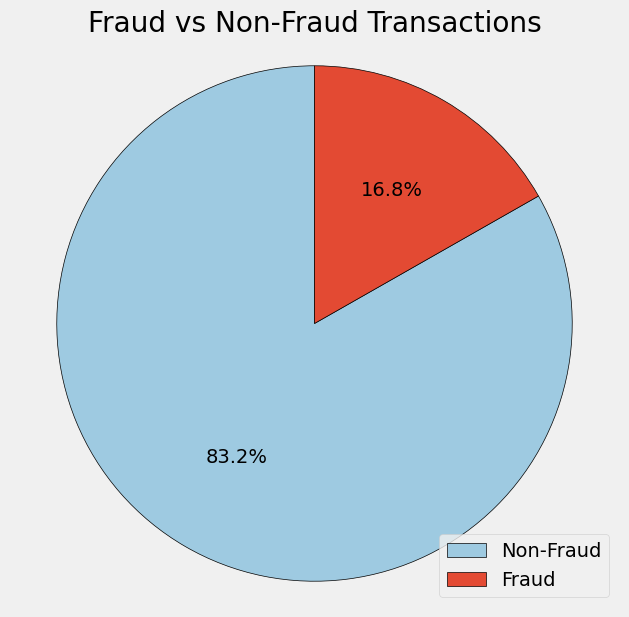

In [9]:
fraud_counts = data['is_fraud'].value_counts()
colors = ['#9ecae1', '#e34a33']
plt.figure(figsize=(7, 7))
plt.pie(fraud_counts, autopct='%1.1f%%', startangle=90, colors=colors, wedgeprops={'edgecolor': 'black'})
plt.legend(labels=['Non-Fraud', 'Fraud'], loc='lower right')
plt.axis('equal')
plt.title('Fraud vs Non-Fraud Transactions')
plt.show()

In [10]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import make_scorer, accuracy_score

In [11]:
label_encoder = LabelEncoder()

data['job_category'] = label_encoder.fit_transform(data['job_category'])
data['category'] = label_encoder.fit_transform(data['category'])


X = data.drop(columns=['is_fraud'])
y = data['is_fraud']

In [12]:
rf_classifier = RandomForestClassifier(n_estimators=20, random_state=99, n_jobs=-1, max_depth=5, min_samples_split=10)
cv_scores = cross_val_score(rf_classifier, X, y, cv=5, scoring='accuracy')
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean accuracy: {cv_scores.mean():.4f}")
print(f"Standard deviation of accuracy: {cv_scores.std():.4f}")

Cross-validation scores: [0.93962508 0.9383969  0.94191984 0.9429541  0.94062702]
Mean accuracy: 0.9407
Standard deviation of accuracy: 0.0016


In [13]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter grid
param_grid = {
    'n_estimators': [5, 10, 20, 30],
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 7],
    'min_samples_leaf': [1, 2, 4]
}

# GridSearchCV to tune RandomForestClassifier
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit grid search
grid_search.fit(X, y)

# Best hyperparameters found by GridSearchCV
print(f"Best parameters: {grid_search.best_params_}")

# You can also use the best model to check cross-validation score
best_rf = grid_search.best_estimator_
cv_scores_best = cross_val_score(best_rf, X, y, cv=5, scoring='accuracy')
print(f"Cross-validation scores with best model: {cv_scores_best}")
print(f"Mean accuracy: {cv_scores_best.mean():.4f}")


Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Cross-validation scores with best model: [0.98148028 0.98319328 0.98306399 0.98329024 0.98264383]
Mean accuracy: 0.9827


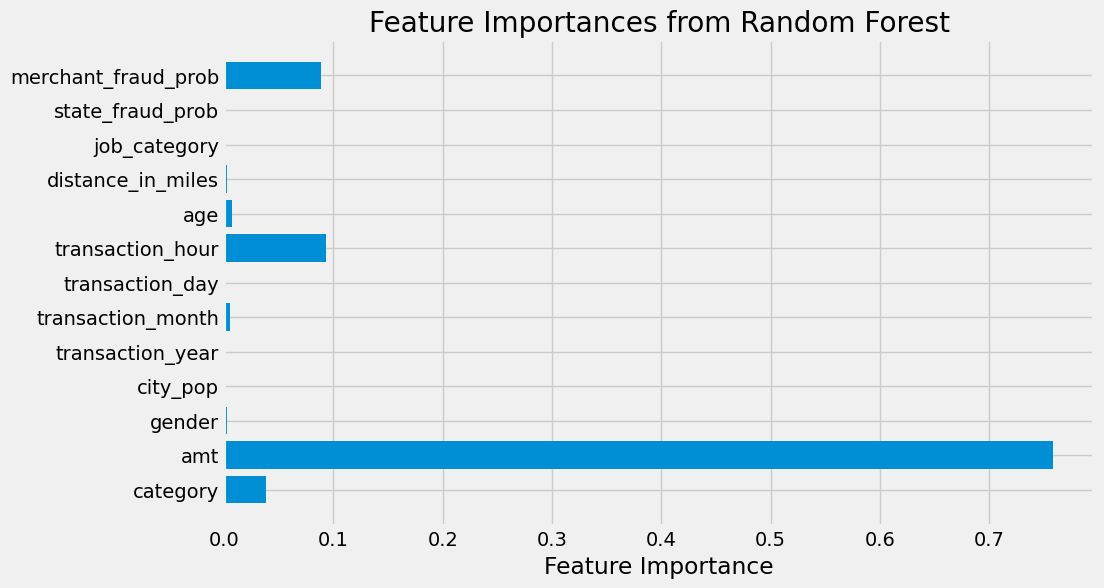

In [14]:
import matplotlib.pyplot as plt

# Fit the best Random Forest model to the entire dataset
rf_classifier.fit(X, y)

# Get feature importances
importances = rf_classifier.feature_importances_

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(X.columns, importances)
plt.xlabel('Feature Importance')
plt.title('Feature Importances from Random Forest')
plt.show()
